In [1]:
#영수증 인식
#import cv2. numpy as np
#의미적으로, import cv2, import numpy as np와 같다.
#처음에는 패키지 로딩이 필요해서 좀 걸리나, 한번 로딩한 후부터는, 과정이 생략되어 속도가 개선된다.

import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 
from PIL import ImageFont, ImageDraw, Image

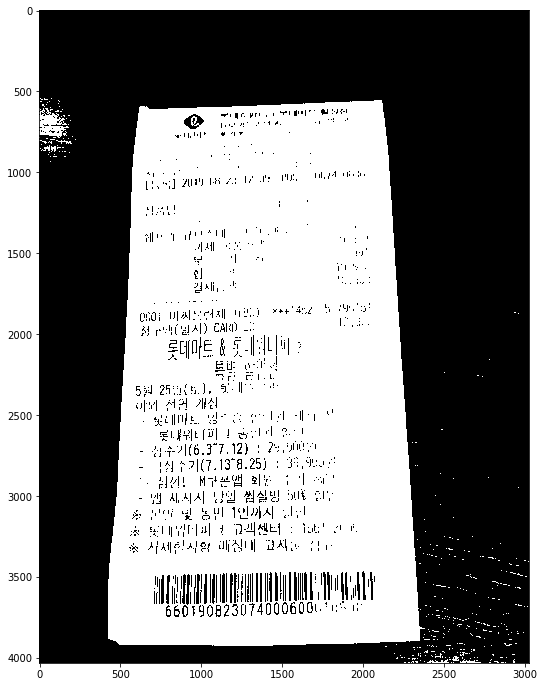

shape = 394
shape = 1377 length = 10432.96166920662 approx = 4 
넓이 :  5759258.5


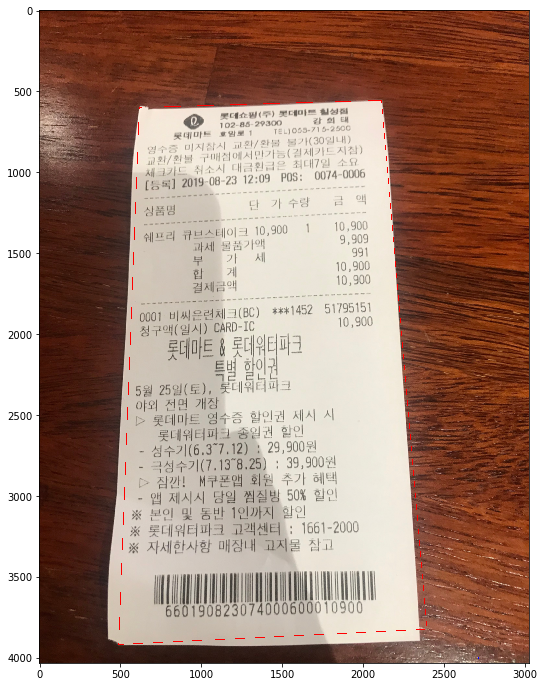

In [37]:
ip = "C:/Users/student/Desktop/OpenCV/"

#그래프와 이미지 형태로 항상 출력되도록, 함수로 정의
def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3:
        #흑백영상이면, shape이 2, 칼라면 3, 칼라면 BGR패턴을 RGB 패턴으로, 흑백은 gray
        
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap="gray")
    plt.show()

image = cv2.imread(ip + 'mart2.jpg')

img_blur = cv2.GaussianBlur(image, (5, 5), 5) #이값을 크게할수록 가장자리가 블러링된다.

img = img_blur

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
thr, mask = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#mask = 255 - mask

plt.figure(figsize = (12, 12))
imshow("", mask)

mask = cv2.medianBlur(mask, 5)

contours, _ = cv2.findContours(mask, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#칸투어 개수
print(  f"shape = {len(contours)}"  )

#c번째, 칸투어 정보
for con in contours :
    
    peri = cv2.arcLength(con, True) #칸투어의 길이를 구하는 함수, True를 주는 이유는 도중에 끊기더라도, 폐곡선임을 가정하려고 한다.
    approx = cv2.approxPolyDP(con, 0.01*peri, True) #길이가 0.1%정도 변화가 생기면 꼭지점으로 인식, True는 폐곡선으로 만들어준다. 
    
    area = cv2.contourArea(con)
    
    if(area > 20000):
        print(  f"shape = {len(con)} length = {peri} approx = {len(approx)} " ) #approximation은 n각형을 의미 대략적인 각 도형들의 값을 알 수 있다.
        print("넓이 : ", cv2.contourArea(con)) #노이즈 제거에도 사용할 수 있다.
    else:
        continue
    #x = con[1][0][0] #칸투어 [a][][] a번째, x좌표
    #y = con[1][0][1] #칸투어 [a][][] a번째, y좌표

    #p = tuple(con[1][0])

    cv2.drawContours(img, [approx], -1, (0, 0, 255), 2)
    cv2.circle(img, (x,y), 5, (255,0,0), -1)
    
    plt.figure(figsize = (12, 12))
    imshow("", img)

